# Applying Machine Learning techniques for Simple Financial Forecasting

# Introduction:

- The intersection of finance  and technology, particularly in how machine learning can help with the complexities of stock market behaviors.

- It is believed that in-between the unpredictable nature of the stock markets, machine learning offers a valuable insight.

# Aim:

- The aim is to unravel the complexities of stock market fluctuations and seek  machine learning's predictive power to forecast stock prices.

# Objectives:

- To create a few features from the data, feeding them into model that'll be used to build a working model.

- To predict the outcome variable on the basis of few selected features, and evaluate its performance.

# Methodology

In [233]:
#installing necessary libraries

#!pip install numpy pandas yfinance matplotlib scikit-learn tensorflow [REMOVE COMMENT]


In [234]:
import pandas as pd
import numpy as np
import yfinance as yfin

### DATASET

In [257]:
# Getting dataset

label='AAPL'
df=yfin.download('AAPL',start='2019-01-01',end='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [258]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.943256,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.163826,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.622257,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.542965,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.220524,164101200


### Feature Engineering

In [259]:
# Log Returns

df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

In [260]:
# Moving Averages

df['MA10']=df['Close'].rolling(window=7).mean()   # 10 days taken into consideration
df['MA25']=df['Close'].rolling(window=30).mean()  # 25 days taken into consideration

In [261]:
# Exponential Moving Averages

EMA1=df['Close'].ewm(span=15,adjust=False).mean()  # 12 days into consideration
EMA2= df['Close'].ewm(span=28, adjust=False).mean() # 28 days into consideration

In [262]:
# Moving Average Convergence Divergence

df['MACD'] = EMA1 - EMA2

In [263]:
# Relative Strength Index (RSI)

con = df['Close'].diff(1)
gain = con.where(con > 0, 0)
loss = -con.where(con < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
RS = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + RS))

In [264]:
# Bollinger Bands

df['20_day_SMA'] = df['Close'].rolling(window=20).mean()
df['Std_dev'] = df['Close'].rolling(window=20).std()
df['Bollinger_Upper'] = df['20_day_SMA'] + (df['Std_dev'] * 2)
df['Bollinger_Lower'] = df['20_day_SMA'] - (df['Std_dev'] * 2)

In [265]:
# Checking for null values

df.isnull().sum()

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Log_Return          1
MA10                6
MA25               29
MACD                0
RSI                13
20_day_SMA         19
Std_dev            19
Bollinger_Upper    19
Bollinger_Lower    19
dtype: int64

In [266]:
df=df.dropna()

### Model Training

In [245]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Log_Return', 'MA10', 'MA25', 'MACD', 'RSI', 'Bollinger_Upper', 'Bollinger_Lower']
x = df[features]
y = df['Close']

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [247]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [248]:
sample_input = pd.DataFrame.from_dict({
    'Open': [150.0],
    'High': [153.0],
    'Low': [149.5],
    'Close': [152.3],
    'Volume': [100000],
    'Log_Return': [0.02],
    'MA10': [148.0],
    'MA25': [146.5],
    'MACD': [0.5],
    'RSI': [70],
    'Bollinger_Upper': [154.0],
    'Bollinger_Lower': [144.0]
})

In [252]:
from sklearn.metrics import mean_squared_error, accuracy_score
sample_y_pred=model.predict(sample_input)
sample_y_pred

array([152.36419922])

In [253]:
y_pred=model.predict(x_test)
y_pred

array([ 66.14410118, 131.30970184,  60.35394939, 143.42229721,
        46.30329933, 134.11880142, 172.07200134, 134.76710007,
       139.93810089,  55.80959988, 168.65880493,  47.21687492,
       120.14550018,  78.28970009, 159.46600204, 110.83829926,
        44.4439502 , 124.40515007, 126.02219978,  71.0345504 ,
        49.83847507,  50.59282505, 136.86899902,  72.39009933,
       121.40999908, 142.4929985 , 167.57470016, 141.53509735,
        96.83425018,  60.833475  ,  46.86317528,  47.13360062,
       118.6538504 ,  77.25357651, 120.58699974, 122.10340004,
       141.94029953, 160.2477034 , 138.91779892, 116.59417465,
        68.63844879,  67.43042549,  61.76410015,  69.97382286,
       148.22009964, 128.13300209, 172.03230179,  49.19805008,
       131.92950302,  90.43134857, 167.53650055, 133.11710037,
        50.07345043, 171.83580124,  75.35194969,  78.40337402,
       168.98870392,  50.16735012, 120.87919907,  66.51722595,
        59.23115032,  67.49142456, 110.93692467, 129.84

## Model Evaluation

In [254]:
mse= mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.15493171358569885


## Visualisation 

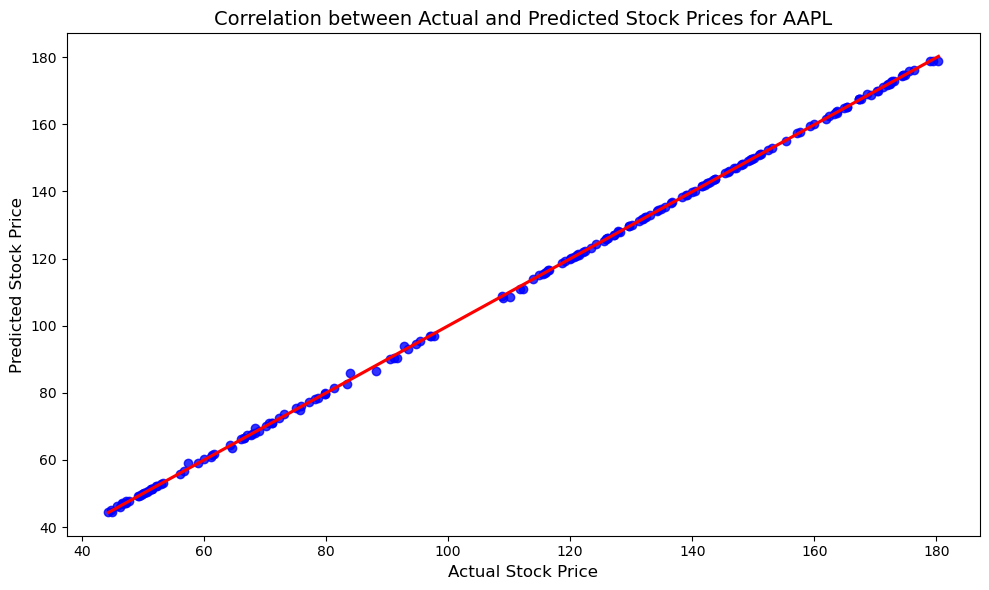

In [219]:
import seaborn as sns

plt.figure(figsize=(10,6))

sns.regplot(x=y_test,y=y_pred,color='blue',line_kws={"color": "red"})

plt.title(f'Correlation between Actual and Predicted Stock Prices for {symbol}', fontsize=14)
plt.xlabel('Actual Stock Price', fontsize=12)
plt.ylabel('Predicted Stock Price', fontsize=12)

plt.tight_layout()
plt.show()

In [220]:
# Residuals
residuals = y_test - y_pred

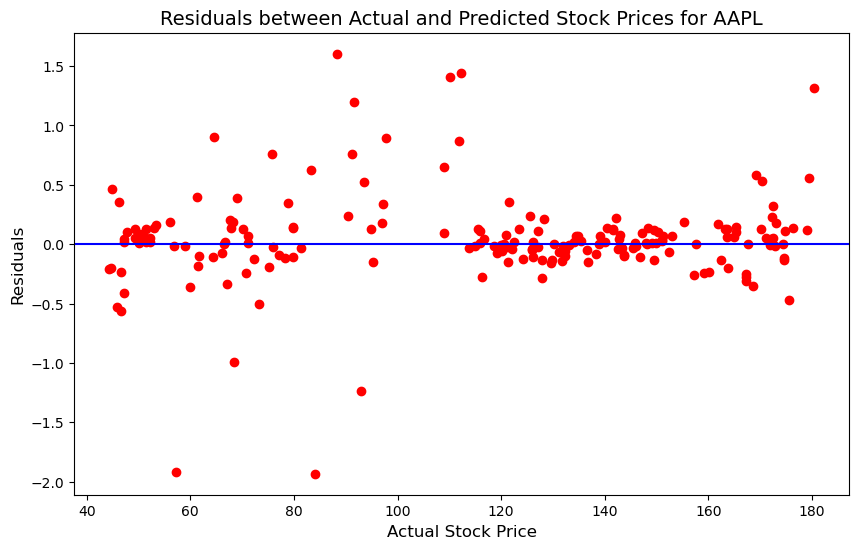

In [268]:
# Create a new figure and set the figure size
plt.figure(figsize=(10, 6))

plt.scatter(y_test, residuals, color='red')
plt.title(f'Residuals between Actual and Predicted Stock Prices for {label}', fontsize=14)
plt.xlabel('Actual Stock Price', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.axhline(y=0, color='blue', linestyle='-')

plt.show()

# Significance

- It holds the potential to aid investment strategies and financial decision-making based on an outcome.

- It can be used as a foundation to explore future possibilities, maybe lead to creation of better trading algorithm.

# Ethical Considerations:

- Highest level of ethical standards are to be maintained, It has to be made sure that the data is open source and licensed for usage.

- Breach of privacy and Intellectual property shouldn't be entertained. 

# Refrences

- Zhang, W., Yoshida, T., & Tang, X. (2019). A Hybrid Model for Stock Price Prediction Using Machine Learning and Sentiment Analysis. Expert Systems with Applications, 136, 1-12.

- Brownlee, J. (2020). How to Develop LSTM Models for Time Series Forecasting. Machine Learning Mastery.

# Conclusion

- Applied Machine Learning model to predict stock price 
- Created few artificial features such as moving average, RSI, Bollinger Bands to bettern the prediction scope
- Model evaluation done to test inaccuracy
- Finally, Visualisation plots created to understand the predicted price vs actual price. 